In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

%matplotlib inline
sns.set()

In [2]:
#データの読み込み
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

    データメモ
    データ詳細
    レコード数:13,731
    列数:3,807
    ・ "ID"列： 各レコードのID
    ・"Score"列： 予測対象となる薬物動態パラメータ
    ・"col1"～"col3805"列： 化合物記述子

In [3]:
#サイズ確認
print("trainデータのサイズ",train_data.shape)

trainデータのサイズ (13731, 3807)


In [4]:
#カラムの表示
train_data.columns

Index(['ID', 'Score', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7',
       'col8',
       ...
       'col3796', 'col3797', 'col3798', 'col3799', 'col3800', 'col3801',
       'col3802', 'col3803', 'col3804', 'col3805'],
      dtype='object', length=3807)

In [5]:
#メモ基本数値

#各データの型
train_data.dtypes

ID           int64
Score      float64
col1         int64
col2       float64
col3       float64
col4         int64
col5       float64
col6       float64
col7       float64
col8       float64
col9         int64
col10      float64
col11        int64
col12        int64
col13        int64
col14      float64
col15      float64
col16      float64
col17        int64
col18      float64
col19        int64
col20      float64
col21      float64
col22      float64
col23      float64
col24      float64
col25      float64
col26        int64
col27      float64
col28      float64
            ...   
col3776    float64
col3777    float64
col3778      int64
col3779      int64
col3780    float64
col3781    float64
col3782    float64
col3783      int64
col3784    float64
col3785    float64
col3786    float64
col3787      int64
col3788      int64
col3789      int64
col3790    float64
col3791      int64
col3792    float64
col3793    float64
col3794    float64
col3795    float64
col3796    float64
col3797     

In [6]:
#欠損値のありなし
train_data.isnull().sum()

ID         0
Score      0
col1       0
col2       0
col3       0
col4       0
col5       0
col6       0
col7       0
col8       0
col9       0
col10      0
col11      0
col12      0
col13      0
col14      0
col15      0
col16      0
col17      0
col18      0
col19      0
col20      0
col21      0
col22      0
col23      0
col24      0
col25      0
col26      0
col27      0
col28      0
          ..
col3776    0
col3777    0
col3778    0
col3779    0
col3780    0
col3781    0
col3782    0
col3783    0
col3784    0
col3785    0
col3786    0
col3787    0
col3788    0
col3789    0
col3790    0
col3791    0
col3792    0
col3793    0
col3794    0
col3795    0
col3796    0
col3797    0
col3798    0
col3799    0
col3800    0
col3801    0
col3802    0
col3803    0
col3804    0
col3805    0
Length: 3807, dtype: int64

In [7]:
train_data.describe()

,ID,Score,col1,col2,col3,col4,col5,col6,col7,col8,...,col3796,col3797,col3798,col3799,col3800,col3801,col3802,col3803,col3804,col3805
count,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,...,13731.000000,13731.000000,1.373100e+04,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000
mean,13715.888428,2.024839,0.000583,4.173750,0.718538,7.142816,12.532379,0.603704,4.345228,0.052560,...,1.215428,0.106329,2.184837e-07,0.115421,25.719365,19.682047,0.014347,1.879396,0.997325,1.035831
std,7891.540358,0.923629,0.026981,0.268635,0.118122,26.261926,9.907825,0.169981,0.281740,0.136567,...,0.443918,0.320774,1.478012e-05,0.033461,28.326643,9.833533,0.118921,1.520451,0.000822,1.755988
min,5.000000,-1.000000,0.000000,2.955000,0.386000,0.000000,0.000000,0.106000,3.457000,-0.399000,...,0.045000,0.000000,0.000000e+00,0.049000,0.000000,4.039000,0.000000,-2.055000,0.991000,0.000000
25%,6908.500000,1.378398,0.000000,3.994500,0.628000,0.000000,4.821500,0.463000,4.101000,-0.048000,...,0.910000,0.000000,0.000000e+00,0.093000,1.798500,12.817500,0.000000,0.797000,0.997000,0.000000
50%,13686.000000,2.034227,0.000000,4.184000,0.725000,0.000000,10.626000,0.606000,4.344000,0.037000,...,1.181000,0.000000,0.000000e+00,0.109000,18.147000,17.383000,0.000000,1.651000,0.997000,0.000000
75%,20528.000000,2.659013,0.000000,4.374000,0.809000,4.000000,18.507500,0.741000,4.582000,0.143000,...,1.476000,0.000000,0.000000e+00,0.130000,39.595500,24.082000,0.000000,2.763500,0.998000,2.000000
max,27463.000000,4.673205,2.000000,4.893000,0.958000,525.000000,72.823000,0.949000,5.099000,0.561000,...,3.785000,2.000000,1.000000e-03,0.505000,254.304000,70.825000,1.000000,11.219000,0.999000,13.000000


In [8]:
train_data.head()

,ID,Score,col1,col2,col3,col4,col5,col6,col7,col8,...,col3796,col3797,col3798,col3799,col3800,col3801,col3802,col3803,col3804,col3805
0,5,3.475628,0,4.058,0.824,0,10.267,0.728,4.403,0.050,...,1.067,0,0.0,0.115,30.395,24.541,0,0.415,0.997,0
1,8,3.601332,0,4.111,0.929,0,8.352,0.907,4.216,0.034,...,0.934,0,0.0,0.227,38.508,35.038,0,3.979,0.997,3
2,9,1.935003,0,4.139,0.833,66,9.494,0.733,4.069,0.267,...,1.722,0,0.0,0.148,27.932,19.518,0,0.849,0.999,0
3,12,3.283663,0,4.016,0.880,0,8.237,0.836,3.956,0.129,...,0.993,0,0.0,0.124,18.993,25.403,0,0.988,0.998,0
4,14,3.409121,0,4.657,0.522,0,35.882,0.383,4.234,-0.089,...,2.095,0,0.0,0.088,44.225,15.741,0,1.595,0.997,0


In [9]:
#col1から順番に見ていく

(array([1.3724e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

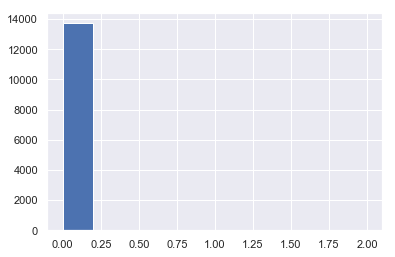

In [10]:
plt.hist(train_data["col1"])

(array([3.000e+00, 2.300e+01, 1.350e+02, 6.210e+02, 1.711e+03, 3.036e+03,
        3.739e+03, 2.986e+03, 1.324e+03, 1.530e+02]),
 array([2.955 , 3.1488, 3.3426, 3.5364, 3.7302, 3.924 , 4.1178, 4.3116,
        4.5054, 4.6992, 4.893 ]),
 <a list of 10 Patch objects>)

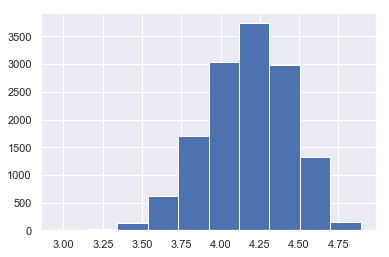

In [11]:
plt.hist(train_data["col2"])

    データ量(カラム)が多すぎるからLasso回帰で関係ありそうなものだけに絞る

In [12]:
#データ前処理

#x
x_data = train_data.drop(["ID","Score"],axis = 1)

#y
y_data = train_data["Score"]

In [13]:
from sklearn.linear_model import Lasso

#alphaはdefault

#インスタンス生成
lasso = Lasso(alpha=1.0,random_state=0)

In [14]:
#fit モデル作成
lasso.fit(x_data,y_data)

C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
#係数
lasso.coef_

array([ 0., -0.,  0., ..., -0.,  0., -0.])

In [16]:
#切片
lasso.intercept_

1.7397082346602257

# 係数が0以上のカラムのみに絞る

In [17]:
result_boolean = lasso.coef_ >0

In [18]:
#0の番号のみ格納
true_list = []
counter = 1

for i in result_boolean:
    if i == True:
        true_list.append(counter)
    counter+=1 

In [19]:
print(len(true_list),"個")
print(true_list)

23 個
[121, 728, 749, 1249, 1316, 1393, 1629, 1632, 1777, 2117, 2221, 2326, 2343, 2411, 3075, 3147, 3312, 3460, 3500, 3610, 3698, 3750, 3793]


In [20]:
col_name  = list(map((lambda x :'col'+ str(x)),true_list))
col_name.insert(0,"ID")
col_name.insert(1,"Score")
print(col_name)

['ID', 'Score', 'col121', 'col728', 'col749', 'col1249', 'col1316', 'col1393', 'col1629', 'col1632', 'col1777', 'col2117', 'col2221', 'col2326', 'col2343', 'col2411', 'col3075', 'col3147', 'col3312', 'col3460', 'col3500', 'col3610', 'col3698', 'col3750', 'col3793']


In [21]:
extra_col_data = train_data[col_name]

In [22]:
extra_col_data.head()

,ID,Score,col121,col728,col749,col1249,col1316,col1393,col1629,col1632,...,col2411,col3075,col3147,col3312,col3460,col3500,col3610,col3698,col3750,col3793
0,5,3.475628,0.0,77.251,2877.800,282.180,36.145,647.55,10957,96.646,...,33.797,766,20287.953,47116,1209.087,188.338,259.796,240.418,43.610,18.472
1,8,3.601332,0.0,114.782,3536.258,181.767,92.973,719.76,13489,136.109,...,62.214,931,26020.677,25075,1859.362,200.109,332.231,0.000,74.263,29.724
2,9,1.935003,0.0,45.808,2534.835,159.256,132.444,705.75,8186,47.473,...,495.014,596,15948.691,12668,1064.793,117.711,278.105,0.000,251.877,287.425
3,12,3.283663,0.0,98.536,2910.015,167.542,40.105,639.99,10457,60.043,...,44.250,791,19621.563,21563,1228.072,217.397,225.254,0.000,73.489,24.827
4,14,3.409121,0.0,156.156,8087.613,702.262,115.192,907.32,33543,139.141,...,113.544,1572,71926.872,218220,1417.553,235.422,527.180,199.269,67.183,45.400


# 抽出したcolumnsのデータを確認していく

In [23]:
#基本統計量を確認
extra_col_data.describe()

,ID,Score,col121,col728,col749,col1249,col1316,col1393,col1629,col1632,...,col2411,col3075,col3147,col3312,col3460,col3500,col3610,col3698,col3750,col3793
count,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,...,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000
mean,13715.888428,2.024839,25.522838,89.604064,3523.500032,332.573269,79.016484,703.809765,13697.367927,105.899767,...,98.905941,838.302964,27999.192560,37745.786323,1229.582692,224.506471,334.050228,70.448702,98.050122,71.688312
std,7891.540358,0.923629,59.809903,34.239829,2029.868580,210.106810,40.999448,166.904549,7534.766064,40.230317,...,92.447147,324.443132,17149.455353,35423.661881,746.278988,71.345766,101.505992,80.360738,69.039274,68.648700
min,5.000000,-1.000000,0.000000,0.000000,96.690000,21.523000,0.000000,137.570000,532.000000,5.069000,...,3.746000,86.000000,596.901000,371.000000,98.051000,35.313000,46.313000,0.000000,9.114000,5.372000
25%,6908.500000,1.378398,0.000000,67.204000,2078.903000,187.607500,50.290000,597.855000,8263.000000,77.123000,...,49.001000,605.000000,15630.151000,15190.000000,700.614000,176.567000,257.298000,0.000000,52.723500,25.955500
50%,13686.000000,2.034227,0.000000,89.142000,3149.300000,281.504000,76.250000,697.730000,12315.000000,103.370000,...,75.071000,813.000000,24480.912000,27030.000000,1066.601000,215.069000,326.819000,0.000000,79.559000,43.215000
75%,20528.000000,2.659013,0.000000,111.828000,4606.739000,423.651500,104.788000,808.090000,17784.000000,130.387000,...,115.913000,1038.000000,36775.278500,48030.000000,1543.316500,270.735000,406.444000,135.521500,122.200000,84.895500
max,27463.000000,4.673205,428.430000,286.774000,16727.468000,2742.972000,286.774000,1429.350000,62717.000000,278.508000,...,866.519000,2500.000000,144694.171000,461664.000000,5747.384000,540.362000,678.600000,491.176000,653.500000,515.592000


# col121

(array([1.1391e+04, 1.6300e+02, 6.1200e+02, 8.9900e+02, 5.3700e+02,
        7.1000e+01, 1.9000e+01, 1.0000e+01, 1.6000e+01, 1.3000e+01]),
 array([  0.   ,  42.843,  85.686, 128.529, 171.372, 214.215, 257.058,
        299.901, 342.744, 385.587, 428.43 ]),
 <a list of 10 Patch objects>)

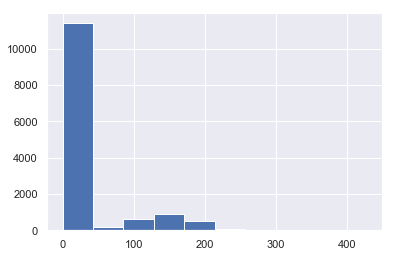

In [24]:
plt.hist(extra_col_data["col121"])

# col728

(array([5.060e+02, 1.874e+03, 3.976e+03, 4.342e+03, 2.223e+03, 6.670e+02,
        1.060e+02, 2.400e+01, 3.000e+00, 1.000e+01]),
 array([  0.    ,  28.6774,  57.3548,  86.0322, 114.7096, 143.387 ,
        172.0644, 200.7418, 229.4192, 258.0966, 286.774 ]),
 <a list of 10 Patch objects>)

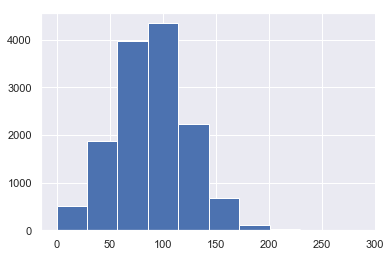

In [25]:
plt.hist(extra_col_data["col728"])

# col749

(array([2.496e+03, 5.271e+03, 3.278e+03, 1.628e+03, 7.300e+02, 2.260e+02,
        5.900e+01, 3.200e+01, 8.000e+00, 3.000e+00]),
 array([   96.69  ,  1759.7678,  3422.8456,  5085.9234,  6749.0012,
         8412.079 , 10075.1568, 11738.2346, 13401.3124, 15064.3902,
        16727.468 ]),
 <a list of 10 Patch objects>)

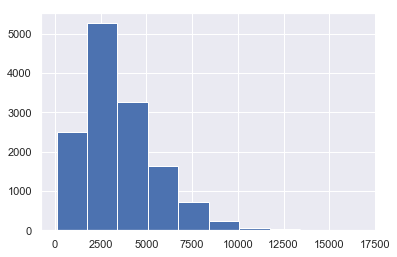

In [26]:
plt.hist(extra_col_data["col749"])

(array([7.251e+03, 4.781e+03, 1.274e+03, 3.550e+02, 5.000e+01, 8.000e+00,
        4.000e+00, 5.000e+00, 1.000e+00, 2.000e+00]),
 array([  21.523 ,  293.6679,  565.8128,  837.9577, 1110.1026, 1382.2475,
        1654.3924, 1926.5373, 2198.6822, 2470.8271, 2742.972 ]),
 <a list of 10 Patch objects>)

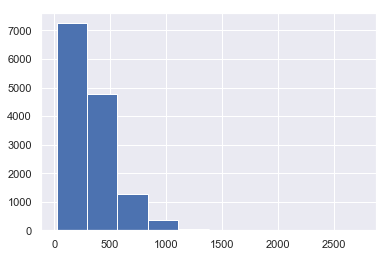

In [27]:
plt.hist(extra_col_data["col1249"])

# 相関を確認

In [28]:
extra_col_data.corr()

,ID,Score,col121,col728,col749,col1249,col1316,col1393,col1629,col1632,...,col2411,col3075,col3147,col3312,col3460,col3500,col3610,col3698,col3750,col3793
ID,1.000000,-0.020312,0.000789,0.001052,0.012321,0.009453,-0.002495,0.006613,0.012436,-0.000679,...,-0.006922,0.011734,0.011498,0.018516,0.001840,0.020283,0.007873,0.011387,-0.002982,0.000297
Score,-0.020312,1.000000,0.016702,0.137446,-0.010601,-0.015537,0.179127,0.092197,-0.022039,-0.078635,...,0.052438,0.017555,-0.026497,-0.010708,0.091057,-0.096509,-0.063649,0.038749,0.113778,0.149289
col121,0.000789,0.016702,1.000000,0.097163,0.110177,0.109249,0.068849,0.059500,0.145654,0.071190,...,-0.012383,0.152474,0.134346,0.248347,0.164725,0.131129,0.115058,-0.173202,-0.038504,-0.073542
col728,0.001052,0.137446,0.097163,1.000000,0.532274,0.461365,0.671233,0.570367,0.533266,0.029759,...,0.199889,0.532676,0.534931,0.380508,0.360381,0.233111,0.468899,0.101134,0.297397,0.175034
col749,0.012321,-0.010601,0.110177,0.532274,1.000000,0.800080,0.549566,0.756173,0.979920,0.287621,...,0.369967,0.950741,0.982500,0.712763,0.729229,0.656806,0.727765,0.185811,0.395302,0.324950
col1249,0.009453,-0.015537,0.109249,0.461365,0.800080,1.000000,0.378129,0.522112,0.835522,0.370077,...,0.113994,0.819654,0.835182,0.599925,0.655347,0.674504,0.696906,0.184494,0.143429,0.073690
col1316,-0.002495,0.179127,0.068849,0.671233,0.549566,0.378129,1.000000,0.728478,0.508128,-0.004274,...,0.657304,0.468530,0.530787,0.232640,0.316443,0.150555,0.392914,-0.009918,0.750447,0.698259
col1393,0.006613,0.092197,0.059500,0.570367,0.756173,0.522112,0.728478,1.000000,0.745260,0.228039,...,0.601477,0.714657,0.750500,0.544355,0.418851,0.267647,0.362058,0.205822,0.671995,0.656130
col1629,0.012436,-0.022039,0.145654,0.533266,0.979920,0.835522,0.508128,0.745260,1.000000,0.367092,...,0.308769,0.975106,0.997334,0.766193,0.730047,0.676401,0.723902,0.219241,0.335444,0.261222
col1632,-0.000679,-0.078635,0.071190,0.029759,0.287621,0.370077,-0.004274,0.228039,0.367092,1.000000,...,-0.101044,0.355760,0.367979,0.252368,0.159161,0.266686,0.376440,0.039940,-0.127491,-0.173994


In [ ]:
#ヒートマップで確認

sns.heatmap(extra_col_data,square=True,annot=True)

    memo
    scoreと相関のあるカラムがほぼない

線形回帰分析

In [29]:
#絞ったカラムのみで行う

In [42]:
#train data
X_train_data = extra_col_data.drop(["ID","Score"],axis=1)
y_train_data = extra_col_data["Score"]

#test data
test_col_name = col_name
#test_col_name.remove("Score")
test_extra_col_data = test_data[test_col_name]
X_test_data = test_extra_col_data.drop(["ID"],axis=1)

In [44]:
from sklearn.linear_model import LinearRegression

In [47]:
#モデル生成
reg = LinearRegression()

In [49]:
#fit
reg.fit(X_train_data,y_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
#予測
result = reg.predict(X_test_data)
result_data = pd.DataFrame(result,columns=["Score"])

In [66]:
test_id = test_extra_col_data["ID"]
submission_data = pd.DataFrame(test_id,columns=["ID"])

In [67]:
submission_data = pd.concat([submission_data,result_data],axis=1)

In [69]:
submission_data.head()

,ID,Score
0,1,1.793577
1,2,2.233592
2,3,2.129538
3,4,2.277516
4,6,2.072616


In [70]:
#結果の出力
submission_data.to_csv("LinearRegression.csv",index=False,header=False)

    メモ
    score 0.15940
    めちゃくちゃ低かった
    
    次回
    Scoreとの相関関係を調べ、高いものを利用してみる
    クラス分け等カテゴリデータによる区別ができないからそれを考えてカラムを抽出する方法を考える必要がある
    
    カラムごとに見たときに山型になるものや一部のみ値が存在するカラムがあった
    この辺も調べてみる

In [ ]:
#普通に線形回帰してみると

In [71]:
#train_data
X_train_data = train_data.drop(["ID","Score"],axis=1)
y_train_data = train_data["Score"]

#test data
X_test_data = test_data.drop(["ID"],axis=1)

In [72]:
#モデル生成
reg = LinearRegression()

In [73]:
#fit
reg.fit(X_train_data,y_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
#予測
result = reg.predict(X_test_data)
result_data = pd.DataFrame(result,columns=["Score"])
test_id = test_extra_col_data["ID"]
submission_data = pd.DataFrame(test_id,columns=["ID"])
submission_data = pd.concat([submission_data,result_data],axis=1)

In [75]:
#結果の出力
submission_data.to_csv("LinearRegression_nomal.csv",index=False,header=False)

    Score -12,714,875.90268
    意味わからん数字出たので論外